* **her below is the code written by kaggle when we click on new notebook in perticular dataset.It is pedifinded code which gives us the address of the dataset.**
* **In your case either directly use dataset from kaggle or change the path in read_csv() function if you want to use it extenally.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df=df.drop(columns=['Serial No.'])

#drop serial number column as it is not important 

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

#by info() function we can check charecteristics of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
df.duplicated().sum()

#here we check our dataset contain any duplicate row or column or not

0

In [7]:
x=df.iloc[:,:-1]
x.head()

#input columns

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [8]:
y=df.iloc[:,-1]
y.head()

#output columns

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

# Scalling

* **In simple word scalling means we devide whole data with appropriate number to reduse number value.This appropriate number is selected by scalling class itself.**

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

* when we know about upper bound and lower bound of any column then it is peferable to use MinMaxScaler class instead of StanderdScaler class for scalling.

In [10]:
x=scaler.fit_transform(x)
x

#scalling of x

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#seperate training data and testing data

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#when want to train model sequentially then we use Sequential class
#Dense class is used to establish fully connected network

In [14]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

#model architecture
#7 node/neurons in oth layer
#7 node in 1st layer
#1 node in 2nd layer

#if we solve regrsssion problem then either we use linear activaion fuction in the last layer

In [15]:
model.summary()

#see model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

#when we doing regrssion then loss should be mean_squared_error
#if select optimizer as Adam
#metrics=['accuracy']
#when I want to show accuracy along with loss during training the I have to pass dictionary like this

In [17]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

#model training and store model in history

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 0.5338 - accuracy: 0.0000e+00 - val_loss: 0.5320 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.0000e+00 - val_loss: 0.5035 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4700 - accuracy: 0.0000e+00 - val_loss: 0.4656 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4283 - accuracy: 0.0000e+00 - val_loss: 0.4161 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3753 - accuracy: 0.0000e+00 - val_loss: 0.3551 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3142 - accuracy: 0.0000e+00 - val_loss: 0.2924 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.0000e+00 - 

* validation_split = 0.2
* it is one technique where we take part of data from training data and while traning (while training goes on) we done testing on that data. 
* performance of this type of testing is measured by val_loss and val_accuracy

In [18]:
y_predict=model.predict(x_test)
y_predict

#model testing

array([[0.81115234],
       [0.6563198 ],
       [0.5528773 ],
       [0.84276366],
       [0.5557243 ],
       [0.63049096],
       [0.8012767 ],
       [0.6920531 ],
       [0.95566297],
       [0.81630564],
       [0.7970903 ],
       [0.69468755],
       [0.98591566],
       [0.8832588 ],
       [0.85832506],
       [0.54400474],
       [0.9263804 ],
       [0.507434  ],
       [0.7304063 ],
       [0.54548216],
       [0.7390367 ],
       [0.6234673 ],
       [0.6482101 ],
       [0.7337787 ],
       [0.76158285],
       [0.85067266],
       [0.5594905 ],
       [0.8170713 ],
       [0.48964587],
       [0.9911304 ],
       [0.55733794],
       [0.71874726],
       [0.84137774],
       [0.9574826 ],
       [0.601795  ],
       [0.85871136],
       [0.7981268 ],
       [0.93605185],
       [0.92143786],
       [0.59375846],
       [0.62409   ],
       [0.68205863],
       [0.5979837 ],
       [0.46159583],
       [0.5978205 ],
       [0.81042147],
       [0.65927106],
       [0.754

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

#when we do regression task then we use r2_score as the measure of our model

0.7416641065423375

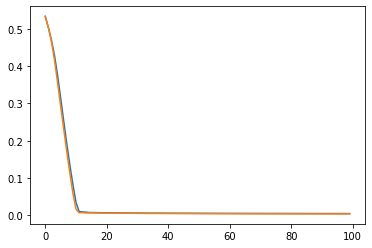

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#plotting graph between training loss and epochs, validation loss and epochs

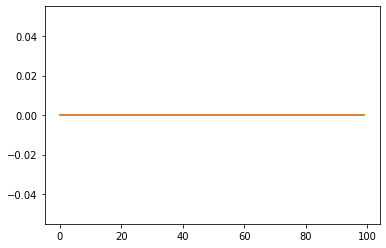

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#making graph between training accuracy v/s epochs and validation accuracy and epochs